In [1]:
import numpy as np

Большая часть млекопитающих неспособны во взрослом возрасте переваривать лактозу, содержащуюся в молоке. У людей за расщепление лактозы отвечает фермент лактаза, кодируемый геном LCT. У людей с вариантом 13910T этого гена лактаза продолжает функционировать на протяжении всей жизни. Распределение этого варианта гена сильно варьируется в различных генетических популяциях.

Из 50 исследованных представителей народа майя вариант 13910T был обнаружен у одного. Постройте нормальный 95% доверительный интервал для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [4]:
n = 50
p = 1

Доверительный интервал на основе нормального распределения$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

In [5]:
from statsmodels.stats.proportion import proportion_confint

In [7]:
normal_interval = proportion_confint(p, n, method = 'normal',alpha=0.05)

In [11]:
print 'normal_interval ', np.round_(normal_interval,4)

normal_interval  [-0.0188  0.0588]


В условиях предыдущей задачи постройте 95% доверительный интервал Уилсона для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки. 

Доверительный интервал Уилсона
$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{
z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [12]:
wilson_interval = proportion_confint(p, n, method = 'wilson',alpha=0.05)

In [13]:
print 'wilson_interval ', np.round_(wilson_interval,4)

wilson_interval  [ 0.0035  0.105 ]


Пусть в популяции майя действительно 2% носителей варианта 13910T, как в выборке, которую мы исследовали. Какой объём выборки нужен, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью ±0.01 на уровне доверия 95%?

In [41]:
from scipy.stats import norm

print np.ceil(sample_volume(0.02, 0.01, alpha))

753.0


In [39]:
def sample_volume(p, err, alpha):
    z = norm.ppf(alpha)
    n = (z*np.sqrt(p*(1-p))/err)**2
    return n
    
alpha = 0.975
ps = np.arange(0.01, 1, 0.01)

In [40]:
print sample_volume(0.02, 0.01, alpha)

752.925928856


Постройте график зависимости объёма выборки, необходимого для оценки для доли носителей гена 13910T с точностью ±0.01 на уровне доверия 95%, от неизвестного параметра p. Посмотрите, при каком значении p нужно больше всего испытуемых. 
Какой объём выборки нужен в худшем случае, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью ±0.01 на уровне доверия 95%?

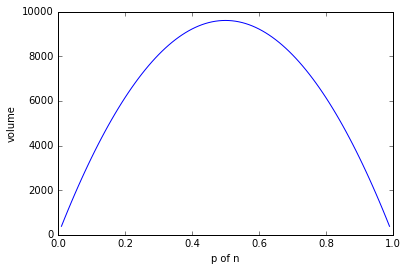

In [42]:
import matplotlib.pyplot as plt

plt.plot(ps, map(lambda x: sample_volume(x, 0.01, alpha), ps))
plt.xlabel('p of n')
plt.ylabel('volume')
plt.show()

In [49]:
print sample_volume(0.5, 0.01, alpha)

9603.64705174
